## Statistical Inference Testing - Zillow & Predicting the Hot Housing Markets

##### After looking at the initial descriptive statistics of the Zillow data, there are a few areas that stand out for further exploration with inferential statistics:
1. Coastal vs Non-Coastal Regions - the states that saw the highest growth over the last 20 years are also on the coast.  Is there an overal significant difference in housing price growth rates of coastal vs non-coastal states?
2. Household Income - I will be tying another dataset to explore how areas with the highest, lowest and medium household incomes compare in overall growth rate of housing prices.
3. Volatility and Growth - in the descriptive statistics, some of the fastest-growing states also saw the biggest crashes in the housing crisis of the late 2000's.  I will compare the regions that had the biggest crashes with overall growth to understand the relationship.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
homes1 = pd.DataFrame.from_csv('data/Zip_Zhvi_Summary_AllHomes.csv', index_col=None)
homes1 = homes1.sort_values('RegionName')
homes1.head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
5450,2017-05-31,58196,1001,MA,Springfield,Hampden,Agawam,5450,197100,0.005099,0.011288,0.066558,0.019908,-0.007074,2006-10,2006-Q4,216300,-0.088766,2005-07
3919,2017-05-31,58197,1002,MA,Springfield,Hampshire,Amherst,3919,318700,0.005363,0.016587,0.048011,0.025937,0.001041,2007-11,2007-Q4,323300,-0.014228,2007-07
10252,2017-05-31,58200,1005,MA,Worcester,Worcester,Town of Barre,10252,220600,-0.013417,-0.033304,0.063645,0.049449,0.000591,2006-04,2006-Q2,237100,-0.069591,2004-11
6404,2017-05-31,58201,1007,MA,Springfield,Hampshire,Town of Belchertown,6404,265200,-0.000377,0.001133,0.023148,0.024474,-0.002308,2006-10,2006-Q4,273900,-0.031763,2006-05
12905,2017-05-31,58202,1008,MA,Springfield,Hampden,Blandford,12905,221800,0.011861,0.031628,0.014639,0.015779,-0.002139,2010-02,2010-Q1,241300,-0.080812,2008-08


In [5]:
homes2 = pd.DataFrame.from_csv('data/Zip_Zhvi_AllHomes.csv', index_col=None)
homes2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1128500,1133300,1132900,1147300,1149800.0,1132700,1121400,1123000,1143700,1178700
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318600,318200,318100,318700,320200.0,321000,322200,323800,325900,327700
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,400700,401900,406000,414000,417800.0,417700,418700,414100,405400,401900
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113700,113800,113800,114100,114500.0,114900,115000,114700,114700,114800
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200000,198800,199200,200100,201500.0,203200,205200,206700,206600,205700


### Test 1 - Coastal vs. Non-Coastal States
Null Hypothesis: The growth rate of housing prices is the same for Coastal States as for Non-Coastal States: P1 - P2 = 0

Alternate Hypothesis: The growth rate of housing prices is not the same for Coastal States as for Non-Coastal States: P1 - P2 =! 0

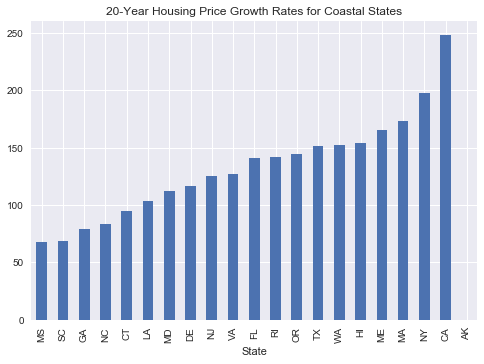

In [6]:
# Defining coastal states and viewing as a bar graph
h = homes2
coastal_states = 'HI,RI,CA,WA,OR,TX,LA,FL,NC,SC,GA,VA,MD,DE,NJ,NY,MS,CT,MA,ME,AK'.split(',')
h_coastal = h[h.State.isin(coastal_states)]
h_coastal = h_coastal.groupby(h_coastal.State).mean()
h_coastal['Percent_Growth'] = (h_coastal['2017-05'] / h_coastal['1996-04'] - 1) * 100 
h_coastal = h_coastal.round(2)
h_coastal = h_coastal.sort_values('Percent_Growth')
h_coastal.Percent_Growth.plot(kind = 'bar', title = "20-Year Housing Price Growth Rates for Coastal States")

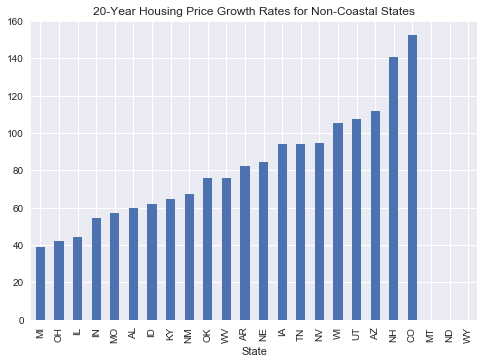

In [7]:
# Defining non-coastal states and viewing as a bar graph
h = homes2
notcoastal_states = 'MI,MO,OH,IL,IN,ND,SD,NE,OK,CO,UT,AZ,NM,WY,AL,AR,ID,KY,PN,WV,NV,MT,IA,NH,WI,TN,VT'.split(',')
h_notcoastal = h[h.State.isin(notcoastal_states)]
h_notcoastal = h_notcoastal.groupby(h_notcoastal.State).mean()
h_notcoastal['Percent_Growth'] = (h_notcoastal['2017-05'] / h_notcoastal['1996-04'] - 1) * 100 
h_notcoastal = h_notcoastal.round(2)
h_notcoastal = h_notcoastal.sort_values('Percent_Growth')
h_notcoastal.Percent_Growth.plot(kind = 'bar', title = "20-Year Housing Price Growth Rates for Non-Coastal States")

In [8]:
# Defining the population for Coastal State Zip Codes
h_coastal = h[h.State.isin(coastal_states)]
h_coastal['Percent_Growth'] = (h_coastal['2017-05'] / h_coastal['1996-04'] - 1) * 100 
coastal_zips = len(h_coastal)
coastal_mean = h_coastal['Percent_Growth'].mean()
coastal_std = h_coastal['Percent_Growth'].std()

h_notcoastal = h[h.State.isin(notcoastal_states)]
h_notcoastal['Percent_Growth'] = (h_notcoastal['2017-05'] / h_notcoastal['1996-04'] - 1) * 100 
notcoastal_zips = len(h_notcoastal)
notcoastal_mean = h_notcoastal['Percent_Growth'].mean()
notcoastal_std = h_notcoastal['Percent_Growth'].std()

mean = coastal_mean - notcoastal_mean
mean

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


59.933482781925946

In [9]:
# Standard Deviation of the differences in the means
std = ((coastal_std**2)/coastal_zips + (notcoastal_std**2)/notcoastal_zips)**(1/2.0)
std

1.1272130202296433

In [10]:
# Z Score for two-tailed test for alpha = .025 is 1.96.  95% confidence interval:
mean - 1.96*std, mean + 1.96*std

(57.72414526227585, 62.142820301576045)

##### Based on the 95% Confidence Interval, there is a very significant difference in the housing growth for coastal states vs non-coastal states.  Coastal states on average saw a 59.9% higher growth in housing prices over the last 20 years than non-coastal states.  If the coastal and non-coastal zip codes were actually the same, the confidence interval would have to include 0, which is does not.

### Test 2 - High Household Income vs Low Household Income
Null Hypothesis: The growth rate of housing prices is the same for zip codes in the highest quartile of Household Income (HHI) as for the lowest quartile of HHI: P1 - P2 = 0
Alternate Hypothesis: The growth rate of housing prices is not the same for zip codes in the highest quartile and lowest quartile of HHI: P1 - P2 =! 0

In [92]:
hhi = pd.DataFrame.from_csv('data/Income_by_zip.csv', index_col=None)
hhi.head()

,Zip,Median,Mean,Pop
0,1001,"56,663","66,688","16,445"
1,1002,"49,853","75,063","28,069"
2,1003,"28,462","35,121","8,491"
3,1005,"75,423","82,442","4,798"
4,1007,"79,076","85,802","12,962"


In [49]:
hhi.columns = ('RegionName', 'MedianIncome', 'MeanIncome', 'Pop')
hhi.head()

,RegionName,MedianIncome,MeanIncome,Pop
0,1001,"56,663","66,688","16,445"
1,1002,"49,853","75,063","28,069"
2,1003,"28,462","35,121","8,491"
3,1005,"75,423","82,442","4,798"
4,1007,"79,076","85,802","12,962"


In [91]:
#attempting to convert MeanIncome to numeric values
hhi = hhi[pd.to_numeric(hhi['MeanIncome'], errors='coerce').notnull()]
hhi.head()

#hhi['MeanIncome'].mean()

KeyError: 'MeanIncome'

In [77]:
df = hhi.join(h, on='RegionName', how='left', lsuffix= 'str', rsuffix= 'str', sort=False)
df.head()

,RegionNamestr,MedianIncome,MeanIncome,Pop,RegionID,RegionNamestr,City,State,Metro,CountyName,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
0,1001,"56,663","66,688","16,445",72480.0,33178.0,Doral,FL,Miami-Fort Lauderdale,Miami-Dade,...,323000.0,325700.0,328700.0,331100.0,332800.0,333200.0,331400.0,328300.0,326700.0,326300.0
1,1002,"49,853","75,063","28,069",96996.0,92692.0,Mission Viejo,CA,Los Angeles-Long Beach-Anaheim,Orange,...,678000.0,681600.0,685400.0,689300.0,692500.0,694400.0,694400.0,693000.0,691000.0,690200.0
2,1003,"28,462","35,121","8,491",67770.0,23602.0,Newport News,VA,Virginia Beach,Newport News City,...,185900.0,186300.0,186300.0,186200.0,185900.0,185300.0,185200.0,185300.0,185200.0,185000.0
3,1005,"75,423","82,442","4,798",99508.0,98023.0,Federal Way,WA,Seattle,King,...,325300.0,327500.0,330400.0,332500.0,334100.0,334800.0,337200.0,341900.0,347600.0,352400.0
4,1007,"79,076","85,802","12,962",81623.0,54220.0,Manitowoc,WI,Manitowoc,Manitowoc,...,98600.0,98900.0,99400.0,100200.0,101000.0,101800.0,102300.0,103000.0,104200.0,105200.0


In [79]:
pd.qcut(range(2), 3, labels=["high","medium","low"])

[high, low]
Categories (3, object): [high < low < medium]

### Test 3 - High Volatility and High Growth

Null Hypothesis: The growth rate of housing prices is the same for zip codes that saw bigger than average declines during the late 2000's housing crisis (bigcrash) as for those that saw smaller than average declines (smallcrash): P1 - P2 = 0
Alternate Hypothesis: The growth rate of housing prices is not the same for bigcrash and smallcrash zip codes: P1 - P2 =! 0

In [100]:
h = homes2
h['Percent_Dip'] = (h['2012-02'] / h['2006-07'] - 1) * 100 
h = h.sort_values('Percent_Dip')
h = h.round(2)
h.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,Percent_Dip
2537,98131,95351,Modesto,CA,Modesto,Stanislaus,2538,78000.0,77500.0,77200.0,...,186600,187700,188900,190000.0,190900,192400,194800,198300,202100,-74.64
5905,98048,95215,Garden Acres,CA,Stockton,San Joaquin,5906,67500.0,66900.0,66700.0,...,162300,163700,164400,166500.0,169100,171800,174700,177900,180600,-74.11
10780,98143,95365,Planada,CA,Merced,Merced,10781,69600.0,69700.0,69200.0,...,132100,133000,131800,129300.0,127900,127100,125900,125900,126800,-73.67
386,95806,89110,Las Vegas,NV,Las Vegas,Clark,387,94700.0,94700.0,94600.0,...,153500,154700,156500,157400.0,157900,159300,161200,162900,164100,-72.96
7861,98164,95388,Winton,CA,Merced,Merced,7862,74400.0,74300.0,74200.0,...,153000,155800,158400,161500.0,164900,167600,168900,170500,172500,-72.89


In [115]:
h['Percent_Dip'].median()

-18.78

In [106]:
np.percentile(h['Percent_Dip'], 75)

nan

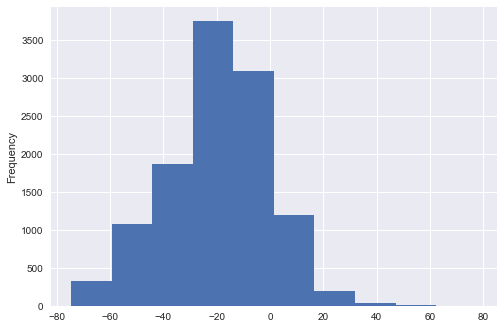

In [109]:
h['Percent_Dip'].plot(kind = 'hist', bins = 10)

In [122]:
# Defining the population for the Zip Codes that saw the biggest crashes vs smallest crashes
h_bigcrash = h[h.Percent_Dip > 18.8]
h_bigcrash['Percent_Growth'] = (h_bigcrash['2017-05'] / h_bigcrash['1996-04'] - 1) * 100 
bigcrash_zips = len(h_bigcrash)
bigcrash_mean = h_bigcrash['Percent_Growth'].mean()
bigcrash_std = h_bigcrash['Percent_Growth'].std()

h_smallcrash = h[h.Percent_Dip < 18.8]
h_smallcrash['Percent_Growth'] = (h_smallcrash['2017-05'] / h_smallcrash['1996-04'] - 1) * 100 
smallcrash_zips = len(h_smallcrash)
smallcrash_mean = h_smallcrash['Percent_Growth'].mean()
smallcrash_std = h_smallcrash['Percent_Growth'].std()

mean = bigcrash_mean - smallcrash_mean
mean

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


-7.258541206695639

In [119]:
# Standard Deviation of the differences in the means
std = ((bigcrash_std**2)/bigcrash_zips + (smallcrash_std**2)/smallcrash_zips)**(1/2.0)
std

4.87174695897625

In [121]:
# Z Score for two-tailed test for alpha = .025 is 1.96.  95% confidence interval:
mean - 1.96*std, mean + 1.96*std


(-16.807165246289088, 2.290082832897811)

##### Based on the 95% Confidence Interval, there is not a significant difference betweeen the zip codes that had a big crash vs small crash in terms of overall growth over the last 20 years.

### Summary

1. Coastal vs. Non-Coastal States - The inferential statistical analysis showed that there is, in fact, a significant difference in the overall housing price growth among Coastal vs Non-Coastal states.  Zip codes in coastal states saw 60% higher growth over the last 20 years, with a 95% confidence interval ranging from 57.1% to 62.1%.  Coastal proximity seems to be a significant factor in housing price growth.

2. Household Income - TBD

3. Volatility and Growth - The inferential statistical analysis showed that there is not a significant difference in growth between the zip codes that saw bigger declines in the 2000s housing crisis, vs those that saw smaller declines.  Housing market volatility does not seem to be a strong predictor of overall growth in housing prices. 

